# なんでも小さく見える画像の合成

ライブラリのインポート

In [6]:
import os
import platform
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys

In [7]:
use_os = platform.system()

if(use_os == "Windows"):
    dir_connect = "\\"
else:
    dir_connect = "/"

ファイルの読み込み

### 入力が必要

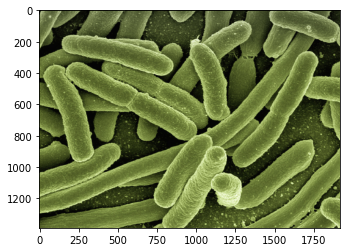

In [26]:
parent_dir = os.getcwd()
# 画像名を入力
pre_image_name = "sample1.jpg"
pre_image_dir = parent_dir + dir_connect + "pre_image" + dir_connect + pre_image_name

if(os.path.exists(pre_image_dir)):
   pre_array_obj = plt.imread(pre_image_dir)
   plt.imshow(pre_array_obj)

else:
   print("画像が存在しません．")
   sys.exit()

尺度の色を選ぶ，画像のサイズを調べる

画像のサイズ：(1388, 1920)
尺度画像のサイズ：(268, 1416)


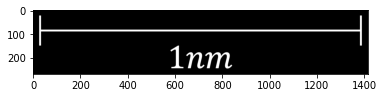

In [27]:
scale_image_name = "scale.jpeg"
scale_dir = parent_dir + dir_connect + "scale_image" + dir_connect + scale_image_name


img1 = cv2.imread(pre_image_dir)
img2 = cv2.imread(scale_dir)

img_high, img_width = img1.shape[:2]
scale_high, scale_width = img2.shape[:2]

print("画像のサイズ：({}, {})".format(img_high, img_width))
print("尺度画像のサイズ：({}, {})".format(scale_high, scale_width))


pre_array_obj2 = plt.imread(scale_dir)
plt.imshow(pre_array_obj2)

尺度画像のリサイズ，出力先の作成

In [30]:
after_scale_width = img_width//3
after_scale_high = (after_scale_width*scale_high)//scale_width

pre_img3 = cv2.imread(scale_dir) 
img3 = cv2.resize(pre_img3, (after_scale_width, after_scale_high))
print("({}, {})".format(img_high, img_width))
print(img3.shape)

after_image_dir = parent_dir + dir_connect + "after_image" + dir_connect + "af_" +pre_image_name

(1388, 1920)
(121, 640, 3)


画像の合成

img_high = 1388, img_width = 1920
(1388, 1920, 3)
scale_high = 268, scale_width = 1416
(268, 1416, 3)
img3.shape
(121, 640, 3)
y_offset = 1267, x_offset = 1280


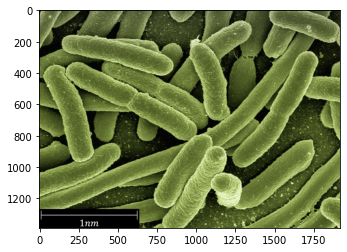

In [31]:
after_image = img1
after_image_dir = parent_dir + dir_connect + "after_image" + dir_connect + "af_" +pre_image_name

y_offset = img_high - after_scale_high
x_offset = img_width - after_scale_width

# 画像の大きさ
print("img_high = {}, img_width = {}".format(img_high, img_width))
print(img1.shape)
# 元の尺度画像の大きさ
print("scale_high = {}, scale_width = {}".format(scale_high, scale_width))
print(img2.shape)
# サイズ変更後の尺度画像の大きさ
print("img3.shape")
print(img3.shape)
print("y_offset = {}, x_offset = {}".format(y_offset, x_offset))

after_image[y_offset : y_offset + after_scale_high, 0 : after_scale_width] = img3
cv2.imwrite(after_image_dir, after_image)
pre_array_obj3 = plt.imread(after_image_dir)
plt.imshow(pre_array_obj3)